<a href="https://colab.research.google.com/github/Basmala-hub/Student-Attendance-Dataset-College-Level-/blob/main/Copy_of_notebook957c26e4f8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

This dataset provides a detailed representation of factors that influence student attendance in a college environment. It includes a wide variety of variables covering student demographics, lifestyle habits, academic background, environmental conditions, and attendance outcomes.

Each record represents a unique student-day profile with realistic behavior patterns. Variables such as study hours, sleep duration, travel time, internet access, weather conditions, hostel residency, and type of class (online/offline) offer an in-depth view of how different factors collectively impact attendance consistency.

The dataset reflects common real-world trends observed in educational institutions. For instance:

Students with higher study hours tend to show greater consistency in attendance.
Rainy weather or long travel times negatively affect attendance.
Online classes increase attendance likelihood due to convenience.
Hostel students generally have lower travel time and slightly better attendance rates.


**How the machine solved it**


1.   Additionally, absence reasons are included to help understand common causes of absenteeism, such as illness, personal work, festivals, travel, or academic project commitments.
2.   The dataset is suitable for educational analysis, institutional planning, behavioral insights, research, dashboards, attendance trend visualization, and general statistical exploration. Since the data is fully synthetic, it avoids privacy issues while maintaining realistic patterns.







     




import libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix

Get path of data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/student-attendance-dataset-college-level")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-attendance-dataset-college-level' dataset.
Path to dataset files: /kaggle/input/student-attendance-dataset-college-level


show files in this path

In [ ]:
import os

print(os.listdir(path))


['Attendance_Prediction.csv']


show 5 samples in dataset

In [ ]:
dataSet=pd.read_csv(f"{path}/Attendance_Prediction.csv")
dataSet.head()

,student_id,age,gender,course,year,parent_education,internet_access,hostel_resident,class_type,weather,study_hours,sleep_hours,travel_time_minutes,attendance,absence_reason
0,200.99,17,male,pharmacy,1st year,high school,no,yes,offline,sunny,3.63,7.24,31,1,none
1,200.99,23,other,diploma,2nd year,high school,yes,yes,offline,cloudy,4.39,7.98,50,0,no reason
2,200.99,22,male,b.sc,3rd year,no formal,yes,yes,online,rainy,5.43,6.53,62,1,none
3,200.99,20,other,pharmacy,2nd year,no formal,yes,yes,offline,cloudy,0.21,7.11,63,0,personal work
4,200.99,20,female,pharmacy,1st year,no formal,yes,yes,online,sunny,1.77,9.35,81,0,project work


show number of features and number of samples

In [ ]:
dataSet.shape

(20000, 15)

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           20000 non-null  float64
 1   age                  20000 non-null  int64  
 2   gender               20000 non-null  object 
 3   course               20000 non-null  object 
 4   year                 20000 non-null  object 
 5   parent_education     20000 non-null  object 
 6   internet_access      20000 non-null  object 
 7   hostel_resident      20000 non-null  object 
 8   class_type           20000 non-null  object 
 9   weather              20000 non-null  object 
 10  study_hours          20000 non-null  float64
 11  sleep_hours          20000 non-null  float64
 12  travel_time_minutes  20000 non-null  int64  
 13  attendance           20000 non-null  int64  
 14  absence_reason       20000 non-null  object 
dtypes: float64(3), int64(3), object(9)
m

Provide summary statistics

In [ ]:
dataSet.describe()

,student_id,age,study_hours,sleep_hours,travel_time_minutes,attendance
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,20.473300,2.989558,7.013978,46.978100,0.516350
std,5770.211372,2.284458,1.727470,1.739200,24.583225,0.499745
min,200.990000,17.000000,0.050000,4.060000,5.000000,0.000000
25%,5000.750000,18.000000,1.480000,5.500000,26.000000,0.000000
50%,10000.500000,20.000000,2.980000,7.010000,47.000000,1.000000
75%,15000.250000,22.000000,4.480000,8.540000,68.000000,1.000000
max,19800.010000,24.000000,5.930000,9.940000,89.000000,1.000000


split featueres and target

In [ ]:
x=dataSet.drop(columns=["attendance","absence_reason"],axis=1)
y=dataSet["attendance"]

List features

In [ ]:
x.columns

Index(['student_id', 'age', 'gender', 'course', 'year', 'parent_education',
       'internet_access', 'hostel_resident', 'class_type', 'weather',
       'study_hours', 'sleep_hours', 'travel_time_minutes'],
      dtype='object')

target

In [ ]:
y.head()

,attendance
0,1
1,0
2,1
3,0
4,0


Feature Type Identification


*   Numerical:because the type of data is int64 or float64
          

      *  student_id
      *   age


     *   study_hours
     *   sleep_hours













*   Binary categorical:as it is presented in zero or one
     

      *   attendance
       *   internet_access
     *   hostel_resident


*   Ordinal categorical:as it's category can be ordered


    *   year
     *   parent_education

     *   weather





*   Nominal categorical:not realation between this values and can't be order



     *   gender
     *   course

     *  class_type










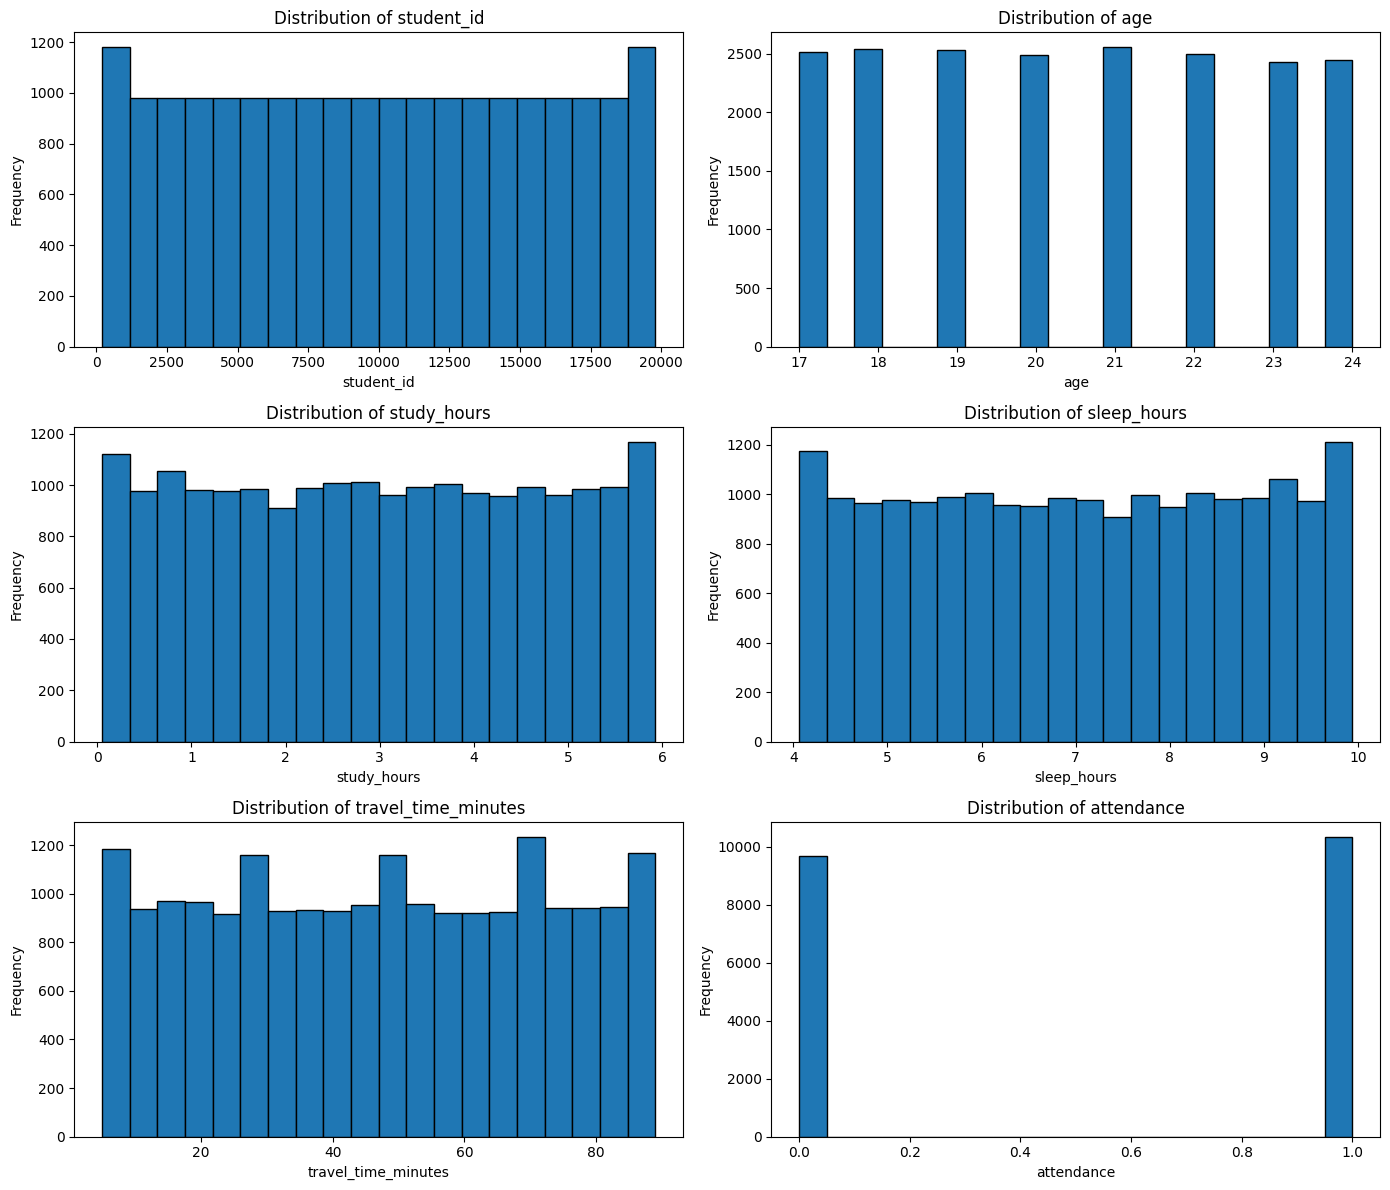

In [ ]:
import matplotlib.pyplot as plt
import math

numeric_columns = dataSet.select_dtypes(include=['int64', 'float64']).columns

n_cols = 2
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(dataSet[col], bins=20, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:

class_counts = y_train.value_counts()
print(class_counts)
class_percentage = y_train.value_counts(normalize=True) * 100
print(class_percentage)


attendance
1    8273
0    7727
Name: count, dtype: int64
attendance
1    51.70625
0    48.29375
Name: proportion, dtype: float64


The classes are almost balanced, but SMOTE can still be applied to achieve an even better balance

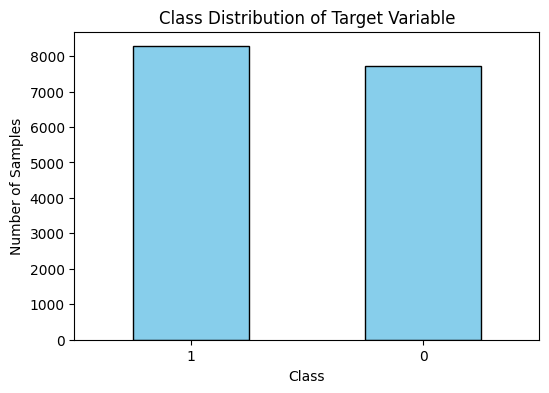

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


show null features

In [ ]:
print(x_train.isnull().sum(),"\n")
print(x_test.isnull().sum())


student_id             0
age                    0
gender                 0
course                 0
year                   0
parent_education       0
internet_access        0
hostel_resident        0
class_type             0
weather                0
study_hours            0
sleep_hours            0
travel_time_minutes    0
dtype: int64 

student_id             0
age                    0
gender                 0
course                 0
year                   0
parent_education       0
internet_access        0
hostel_resident        0
class_type             0
weather                0
study_hours            0
sleep_hours            0
travel_time_minutes    0
dtype: int64


Handling Missing Values for categorical features by Mode

In [ ]:
# cat_cols = [
#     'course',
#     'class_type',
# ]

# for col in cat_cols:
#     mode_val = x_train[col].mode()[0]
#     x_train[col].fillna(mode_val, inplace=True)
#     x_test[col].fillna(mode_val, inplace=True)
x_train=x_train.drop(columns=['course',"class_type"])

In [ ]:
x_train.columns

Index(['student_id', 'age', 'gender', 'year', 'parent_education',
       'internet_access', 'hostel_resident', 'weather', 'study_hours',
       'sleep_hours', 'travel_time_minutes'],
      dtype='object')

OneHotEncoder for Nominal features:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( handle_unknown='ignore',sparse_output=False)
x_train["gender"]=encoder.fit_transform(x_train[["gender"]])
x_test["gender"]=encoder.transform(x_test[["gender"]])


OrdinalEncoder for Ordinal features:

In [ ]:
ordencoder=OrdinalEncoder()
x_train["year"]=ordencoder.fit_transform(x_train[["year"]])
x_train["parent_education"]=ordencoder.fit_transform(x_train[["parent_education"]])
x_train["weather"]=ordencoder.fit_transform(x_train[["weather"]])
x_test["year"]=ordencoder.fit_transform(x_test[["year"]])
x_test["parent_education"]=ordencoder.fit_transform(x_test[["parent_education"]])
x_test["weather"]=ordencoder.fit_transform(x_test[["weather"]])

  Label Encoding   Binary features:

In [ ]:
labelencoder=LabelEncoder()
x_train["internet_access"]=labelencoder.fit_transform(x_train["internet_access"])
x_train["hostel_resident"]=labelencoder.fit_transform(x_train["hostel_resident"])

Handling Missing Values for numerical features by Mean

In [ ]:
# numeric_cols = ['student_id', 'age', 'study_hours', 'sleep_hours']

# for col in numeric_cols:
#     mean_value = x_train[col].mean()
#     x_train[col].fillna(mean_value, inplace=True)
#     x_test[col].fillna(mean_value, inplace=True)

/tmp/ipython-input-652065987.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-652065987.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
x_train.columns

Index(['student_id', 'age', 'gender', 'year', 'parent_education',
       'internet_access', 'hostel_resident', 'weather', 'study_hours',
       'sleep_hours', 'travel_time_minutes'],
      dtype='object')

In [ ]:
x_train

,student_id,age,gender,year,parent_education,internet_access,hostel_resident,weather,study_hours,sleep_hours,travel_time_minutes
5894,5895.0,21,0.0,0.0,4.0,1,0,2.0,2.17,9.38,62
3728,3729.0,19,0.0,3.0,4.0,1,1,2.0,5.49,6.33,5
8958,8959.0,20,0.0,0.0,4.0,0,1,1.0,2.47,5.06,55
7671,7672.0,20,0.0,1.0,0.0,1,0,4.0,2.36,7.80,69
5999,6000.0,17,1.0,3.0,0.0,1,1,2.0,5.79,5.78,31
...,...,...,...,...,...,...,...,...,...,...,...
11284,11285.0,22,1.0,3.0,2.0,0,0,3.0,1.29,6.81,56
11964,11965.0,19,0.0,2.0,0.0,0,1,4.0,3.61,5.35,45
5390,5391.0,18,0.0,3.0,2.0,1,1,2.0,1.52,8.94,49
860,861.0,24,0.0,2.0,3.0,1,1,1.0,2.01,8.80,31


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)
print(y_train_res.value_counts())


attendance
1    8273
0    8273
Name: count, dtype: int64


Feature Scaling

In [ ]:
scale=StandardScaler()
X_train_scaled = scale.fit_transform(x_train[['student_id','age',"study_hours","sleep_hours"]])
x_test_scaled=scale.transform(x_test[['student_id','age',"study_hours","sleep_hours"]])


K-Nearest Neighbors (KNN)

In [ ]:
knndefaultParameters=KNeighborsClassifier(n_neighbors=5)
knndefaultParameters.fit(X_train_scaled,y_train)
y_pred=knndefaultParameters.predict(x_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.54      0.51      0.52      1946
           1       0.56      0.59      0.57      2054

    accuracy                           0.55      4000
   macro avg       0.55      0.55      0.55      4000
weighted avg       0.55      0.55      0.55      4000

[[ 991  955]
 [ 852 1202]]


Performance using GridSearchCV best hyperparameters

In [ ]:

knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_knn.best_score_)
best_knn = grid_knn.best_estimator_
y_pred = best_knn.predict(x_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.5755

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1946
           1       0.58      0.56      0.57      2054

    accuracy                           0.57      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.57      0.57      0.57      4000

Confusion Matrix:
 [[1122  824]
 [ 898 1156]]


Naive Bayes

In [ ]:
naive_bayes = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
y_pred=grid_search.predict(x_test_scaled)
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.59      0.53      0.56      1946
           1       0.60      0.66      0.63      2054

    accuracy                           0.59      4000
   macro avg       0.59      0.59      0.59      4000
weighted avg       0.59      0.59      0.59      4000

